In [67]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>Reading the file</h3>

In [3]:
df = pd.read_csv("data-intern.csv",skiprows=3,engine='python')

In [4]:
df = df.iloc[:,1:]

In [66]:
df.groupby('Age').count()

,sexassault,Are you located in the United States?,What gender do you identify as?,Gender.Other,How is COVID-19 affecting your mental health? I feel ..,"Currently, are you willing to leave the house to see a doctor?",priority,The government is doing a great job with handling the COVID-19 epidemic.,Do you have a partner?,Partner.Other,...,"If you are a survivor of sexual assault, would you use an at-home SAEK (Sexual Assault Evidence Kit) if available?",trustpolice,"If you were assaulted during the ongoing pandemic, do you feel comfortable calling a hotline, such as RAINN?",Ethnicity,Sexual Orientation,Sexual.Orientation.Other,"If you've finished this survey, please type in the code: HB1495 on MTurk, and click yes here.",Start Date (UTC),Submit Date (UTC),Network ID
Age,,,,,,,,,,,,,,,,,,,,,
18 - 24,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
25 - 34,376,376,376,376,376,376,376,376,376,376,...,376,376,376,376,376,376,376,376,376,376
35 - 44,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
45 - 54,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
55 - 74,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
75 or order,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Under 18,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


As we can see 75 or older and Under 18 are outliers. So, its better to not consider them

<h3>Renaming the columns</h3>

In [26]:
df.rename(columns={'Are you a survivor of sexual assault?':'sexassault','Did you report your assault to the police? ':'report','Hospitals should prioritize COVID-19 Patients before Sexual Assault Patients.':'priority','Have you previously experienced sexual assault?':'assaultprev','Do you trust the police?':'trustpolice'},inplace=True)

In [27]:
df.columns

Index(['Age', 'sexassault', 'Are you located in the United States?',
       'What gender do you identify as?', 'Gender.Other',
       'How is COVID-19 affecting your mental health? I feel ..',
       'Currently, are you willing to leave the house to see a doctor?',
       'priority',
       'The government is doing a great job with handling the COVID-19 epidemic.',
       'Do you have a partner? ', 'Partner.Other',
       'How is COVID-19 affecting your partner's mental health? They feel ..',
       'Have you and your partner been fighting more frequently since COVID-19's outbreak?',
       'Has your partner gotten more sexually aggressive since COVID-19's outbreak?',
       'Are you currently experiencing partner on partner abuse?',
       'Are you currently experiencing sexual assault?', 'assaultprev',
       'Was the assailant the same or opposite sex?', 'report',
       'Why didn't you report?',
       'Did you have a Sexual Assault Evidence Kit (SAEK) performed?',
       'During y

In [8]:
ab = df[['Age','sexassault','report']]


In [9]:
ab = ab[ab['sexassault']=='Yes']


In [10]:
ss=ab.groupby(['Age','sexassault'],as_index=False).count()


In [11]:
av = ab[ab['report']=='Yes'].groupby(['Age'],as_index=False).count()


In [62]:
X = av['Age']
Y = (av['report'] / ss['report'])*100

In [63]:
fin1 = pd.concat([X,Y],axis=1)
fin = fin1[:4]


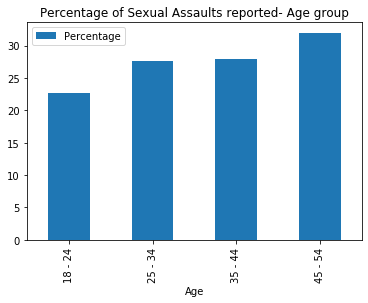

In [64]:
fin.plot(x='Age',y='report',kind='bar',label="Percentage",title="Percentage of Sexual Assaults reported- Age group")

In [16]:
prio = df[['Age','sexassault','priority']]
prio = prio[prio['sexassault']=='Yes']


In [17]:
prio1=prio.groupby(['Age','sexassault'],as_index=False).count()

In [18]:
prioyes = prio[prio['priority'].isin(['Definitely yes','Probably yes'])].groupby('Age',as_index=False).count()


In [19]:
X = prioyes['Age']
Y = (prioyes['priority'] / prio1['priority'])*100

In [20]:
fin1 = pd.concat([X,Y],axis=1)


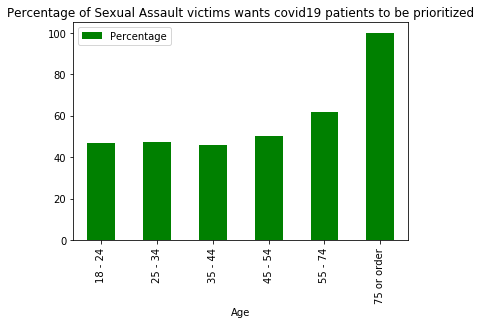

In [56]:
fin1.plot(x='Age',y='priority',kind='bar',label="Percentage",color="Green",title="Percentage of Sexual Assault victims wants covid19 patients to be prioritized")

In [22]:
prev = df[['Age','sexassault','assaultprev']]
prev = prev[prev['sexassault']=='Yes']
count=prev.groupby(['sexassault'],as_index=False).count()
count =count['assaultprev'].to_numpy()

In [23]:
assaultprevyes = prev['assaultprev'].value_counts().to_numpy()


In [24]:
Percentage = assaultprevyes[0]/count[0]*100
NegativeP = 100-Percentage


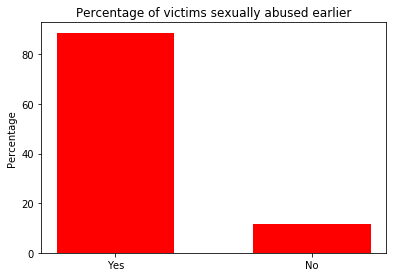

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,.8,.8])
X = ['Yes','No']
Y = [Percentage,NegativeP]
ax.bar(X,Y,color="Red",width=0.6)
ax.set_ylabel('Percentage')
ax.set_title('Percentage of victims sexually abused earlier')
plt.show()

In [58]:
trust = df[['sexassault','trustpolice']]


In [59]:
trust_assault = trust[trust['sexassault']=='Yes']
trust_assault_yes = trust_assault[trust_assault['trustpolice'].isin(['Definitely yes','Slightly yes'])].count()


In [57]:
percent_trust_assault_yes = trust_assault_yes[0]/len(trust_assault)*100


In [60]:
percent_trust_assault_no =100-percent_trust_assault_yes


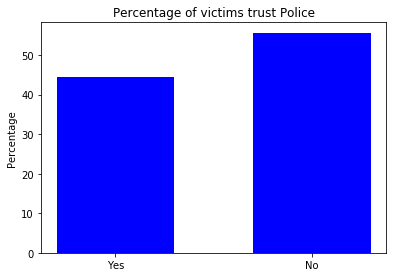

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,.8,.8])
X = ['Yes','No']
Y = [percent_trust_assault_yes,percent_trust_assault_no]
ax.bar(X,Y,color="Blue",width=0.6)
ax.set_ylabel('Percentage')
ax.set_title('Percentage of victims trust Police')
plt.show()